In [39]:
from dotenv import load_dotenv
import os

load_dotenv

<function dotenv.main.load_dotenv(dotenv_path: Union[str, ForwardRef('os.PathLike[str]'), NoneType] = None, stream: Optional[IO[str]] = None, verbose: bool = False, override: bool = False, interpolate: bool = True, encoding: Optional[str] = 'utf-8') -> bool>

In [40]:
GROK_api_key = os.getenv("GROK_API_KEY")

In [25]:
def function1(input1):
    return input1 + "Func1"

def function2(input2):
    return input2 + " is a orchestration"

def function3(input3):
    return input3 + " tool whihc is great"

In [26]:
function1("Hello")

'HelloFunc1'

In [27]:
function2("Hello")

'Hello is a orchestration'

#### Orchestration samples

In [28]:
from langgraph.graph import Graph

In [29]:
workflow1 = Graph()

Creating Nodes

In [30]:
workflow1.add_node("node1-func1", function1)
workflow1.add_node("node1-func2", function2)
workflow1.add_node("node1-func3", function3)

Creating Edges

In [31]:
workflow1.set_entry_point("node1-func1")
workflow1.set_finish_point("node1-func3")

In [32]:
workflow1.add_edge("node1-func1", "node1-func2")
workflow1.add_edge("node1-func2", "node1-func3")

Compiling Graph

In [33]:
app = workflow1.compile()

In [34]:
from IPython.display import Image, display

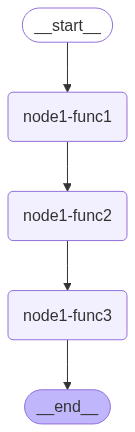

In [35]:
display(Image(app.get_graph().draw_mermaid_png()))

In [44]:
app.invoke("Langgraph Demo")

'Langgraph DemoFunc1 is a orchestration tool whihc is great'

In [45]:
#streaming

for output in app.stream("LangGraph framework"):
    for key, value in output.items():
        print(f"The key is {key} and the value is {value}.\n")

The key is node1-func1 and the value is LangGraph frameworkFunc1.

The key is node1-func2 and the value is LangGraph frameworkFunc1 is a orchestration.

The key is node1-func3 and the value is LangGraph frameworkFunc1 is a orchestration tool whihc is great.



Example 2

In [67]:
from langchain_groq import ChatGroq

In [68]:
def llm(input):
    model = ChatGroq(temperature=0, model="gemma2-9b-it", groq_api_key=GROK_api_key)
    response = model.invoke(input).content
    
    return response
    

In [77]:
def token_counter(response):
    tokens =response.split()
    token_count = len(tokens)
    
    return f"The token count for the LLM output is the follwing : {token_count}"

In [78]:
workflow2 = Graph()

In [79]:
workflow2.add_node("node1-llm-response", llm)
workflow2.add_node("node2-token-counter", token_counter)

In [80]:
workflow2.add_edge("node1-llm-response", "node2-token-counter")

In [81]:
workflow2.set_entry_point("node1-llm-response")
workflow2.set_finish_point("node2-token-counter")

In [82]:
reponse_app = workflow2.compile()

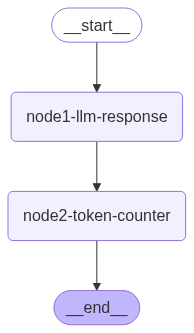

In [83]:
display(Image(reponse_app.get_graph().draw_mermaid_png()))

In [84]:
reponse_app.invoke("What is the meaning of life?")

'The token count for the LLM output is the follwing : 211'

In [86]:

for output in reponse_app.stream("What is the meaning of life?"):
    for key, value in output.items():
        print(f"The key is {key} and the value is {value}.\n")

The key is node1-llm-response and the value is As an AI, I don't have personal beliefs or experiences to draw on, so I can't tell you the meaning of life. That's a deeply personal question that each individual must answer for themselves.

However, I can offer some perspectives:

* **Philosophical perspectives:**

Many philosophers have pondered this question for centuries. Some believe the meaning of life is to find happiness, others believe it's to make a difference in the world, and others believe it's to seek knowledge and understanding.

* **Religious perspectives:**

Many religions offer answers to the meaning of life, often involving a higher power, an afterlife, and a purpose for our existence.

* **Personal perspectives:**

Ultimately, the meaning of life is what you make it. It's up to you to decide what is important to you and what gives your life purpose.

Here are some questions to consider as you explore this question for yourself:

* What brings you joy and fulfillment?
*